# 1. Popularity Based Recommendation System

## About the Dataset (jokes.csv)



 
1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").
  
2. One row per user
3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.



### Q1. Read the data (jokes.csv)

In [1]:
import numpy as np
import pandas as pd

In [2]:
jokes = pd.read_csv('jokes.csv')

In [3]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q2. Create new Dataframe `ratings` starting from column `joke1` and consider first 200 rows only



In [4]:
ratings = jokes.iloc[0:200,1:]
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,99.00,99.00,99.00,99.00,7.91,99.00,3.64,-1.89,99.00,99.00,...,2.96,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [5]:
ratings.shape

(200, 100)

### Q3. Preprocess `ratings`


*   Verify presence of null values
*   Replace null with 0



In [6]:
ratings.isnull().any().sum()

0

In [7]:
ratings.replace(99,0, inplace = True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Q4. Find mean for each joke


*   Find mean of 100 jokes



In [8]:
means_rating = ratings.mean()

In [9]:
means_rating 

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

### Q5. List most popular 10 jokes

In [10]:
means_rating.sort_values(ascending =False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

#2. Collaborative Filtering based Recommendation System

## About the Dataset

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

#### Execute below cells to read the datasets

In [11]:
books = pd.read_csv("BX-Books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

# Q1. Explore the Dataset

1.   Check shape of all the datasets
2.   Print Columns in all the datasets
3.   Remove last 3 columns of `books` ('imageUrlS', 'imageUrlM', 'imageUrlL')and verify



In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [14]:
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')
Index(['userID', 'Location', 'Age'], dtype='object')
Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [15]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [16]:
books1 = books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis =1)

In [17]:
books1.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [18]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Q2. Data Preprocessing

### Create new DataFrame `ratings_new` with:
1.   Books from `ratings` Dataset, which exists in `books` Dataset (Intersect on ISBN)
2.   Ratings from `ratings` Dataset, which exists in `users` Dataset (Intersect on userID)


In [20]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
print(ratings_new.shape)
print(ratings_new.head())

(1031136, 3)
   userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6


In [21]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]
print(ratings_new.shape)
print(ratings_new.head())

(1031136, 3)
   userID        ISBN  bookRating
0  276725  034545104X           0
1  276726  0155061224           5
2  276727  0446520802           0
3  276729  052165615X           3
4  276729  0521795028           6


# Q3. Data Preprocessing

### In new Dataframe, drop rows with 0 `bookRating`, since 0 is mentioned as 'Implicit Rating'.
#### (Check shape of new Dataframe before and after dropping 0s)


In [22]:
ratings_new.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [23]:
rating_explicit = ratings_new[ratings_new.bookRating != 0]

In [24]:
rating_explicit.shape

(383842, 3)

In [25]:
rating_explicit.bookRating.unique()

array([ 5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

# Q4. Check rating's distribution
### Plot a visual to identify highest occuring rating 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt



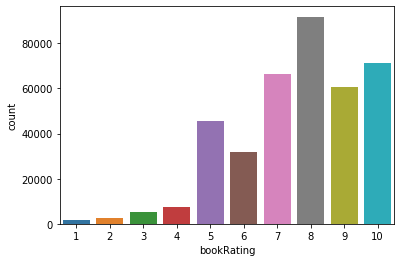

In [27]:
sns.countplot(rating_explicit['bookRating'])

# Q5. Build a User-Based Collaborative Filtering model



1.   Consider users who have rated atleast 100 books
2.   Transform data to surprise format
3.   Assure that only user, book and rating columns are present in the new dataset in surprise format



In [28]:
#use any of the following command in anaconda prompt as administrator before executing pip install for surprise library.
#conda install -c conda-forge scikit-surprise
#conda install -c conda-forge/label/gcc7 scikit-surprise
#conda install -c conda-forge/label/cf201901 scikit-surprise
#conda install -c conda-forge/label/cf202003 scikit-surprise


In [29]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [30]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [31]:
temp=rating_explicit.groupby('userID').agg({'ISBN':'count'}).reset_index()

user_l=temp[temp['ISBN']>=100]['userID'].unique()
ratings_new_1=rating_explicit[rating_explicit['userID'].isin(user_l)]

In [32]:
ratings_new_1.shape

(103271, 3)

In [33]:
#another method

counts = pd.value_counts(rating_explicit['userID'])
rating_explicit = rating_explicit[rating_explicit['userID'].isin(counts[counts >=100].index)]

In [34]:
rating_explicit.shape

(103271, 3)

In [35]:
ratings_new_1.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [36]:
data = Dataset.load_from_df(ratings_new_1,reader)

In [37]:
data.df.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


# Q6. Apply SVD for user based filtering


1.   Split the data into train and test
2.   Train model on SVD
3.   Test Accuracy of the model




In [38]:
from surprise.model_selection import train_test_split

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

In [39]:
from surprise import SVD

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [40]:
test_prediction = algo.test(testset)

In [41]:
test_prediction

[Prediction(uid=168047, iid='0697145042', r_ui=10.0, est=8.994284142792392, details={'was_impossible': False}),
 Prediction(uid=11676, iid='0151885338', r_ui=5.0, est=7.311415885889018, details={'was_impossible': False}),
 Prediction(uid=189835, iid='0815307071', r_ui=5.0, est=5.123042690509034, details={'was_impossible': False}),
 Prediction(uid=178522, iid='0679459626', r_ui=8.0, est=6.962335292674275, details={'was_impossible': False}),
 Prediction(uid=261829, iid='0679735771', r_ui=1.0, est=6.907873760976961, details={'was_impossible': False}),
 Prediction(uid=114368, iid='0671027581', r_ui=5.0, est=5.64650674037977, details={'was_impossible': False}),
 Prediction(uid=194600, iid='0156005891', r_ui=5.0, est=6.820530018216911, details={'was_impossible': False}),
 Prediction(uid=55187, iid='0062512668', r_ui=10.0, est=8.239670082271923, details={'was_impossible': False}),
 Prediction(uid=6242, iid='1861591799', r_ui=7.0, est=6.202471070232206, details={'was_impossible': False}),
 Pre

In [42]:
from surprise import accuracy
accuracy.rmse(test_prediction)

RMSE: 1.4881


1.4881456903541954

# Q7. Create a function to generate `n` recommendations for user `x`. (n, x should be parameterized)

In [43]:
from collections import defaultdict
def get_top_n(predictions, userid,  n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if uid == userid:
            top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [44]:
top_n = get_top_n(test_prediction, userid = 277427,  n=15)

In [45]:
top_n

defaultdict(list,
            {277427: [('0743444477', 8.949546202578931),
              ('0671740504', 8.871760743522023),
              ('0399501487', 8.719528710266855),
              ('0446600415', 8.668451749095633),
              ('0380791978', 8.55601261362544),
              ('0451180739', 8.517787290922724),
              ('0785243038', 8.486473556092909),
              ('0425104338', 8.467526517456688),
              ('0380702843', 8.460558454167128),
              ('1559586893', 8.443700554825883),
              ('0140283374', 8.432246176564115),
              ('0671037692', 8.432246176564115),
              ('0394738136', 8.432246176564115),
              ('0684869098', 8.432246176564115),
              ('0736903054', 8.432246176564115)]})